In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns
#cm = 1/2
cm = 1

In [2]:
def get_df(file):
    f = file
    df = pd.read_csv(f)
    df['timestamp']=pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')   
    return df
    
def get_column(file,remove_outliers,column,remove_zero):
    f = file
    df = pd.read_csv(f)
    df['timestamp']=pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')
    df[column] = pd.to_numeric(df[column], errors='coerce')
    if(remove_outliers==1):
        q = df[column].quantile(0.80)
        df=df[df[column] < q]
        q = df[column].quantile(0.20)
        df=df[df[column] > q]
    dates = df.index.date
    hours = df.index.hour
    df=df.assign(dates=dates)
    df=df.assign(hours=hours)
        
    if(remove_zero==1):
        df = df.loc[(df[column]!=0)]
    new_df = df[[column,'dates','hours']].copy()
    return new_df
    
def date_to_string(date):
    date_obj = datetime.strptime(date, '%Y-%m-%d %H')
    date_str = date_obj.strftime('%Y-%m-%d %H:%M')
    return date_str
    
def date_rang(df,begin,end):
    return df.loc[begin:end]


In [3]:
bitrateTCP = get_column(file='data/downlink_receiver.csv',remove_outliers=1,column='bitrate',remove_zero=0)
bitrateUDP = get_column(file='data/downlinkUDP_receiver.csv',remove_outliers=1,column='bitrate',remove_zero=0)
bitrateTCP_uplink = get_column(file='data/uplink_receiver.csv',remove_outliers=1,column='bitrate',remove_zero=0)
bitrateUDP_uplink = get_column(file='data/uplinkUDP_receiver.csv',remove_outliers=1,column='bitrate',remove_zero=0)
Precipitation = get_column(file='data/sensors2024.csv',remove_outliers=0,column='p0',remove_zero=1)
latency = get_column(file='data/ping.csv',remove_outliers=1,column='avg',remove_zero=0)
boxplotDate_begin = '2024-05-13 00'
boxplotDate_end = '2024-05-21 00'

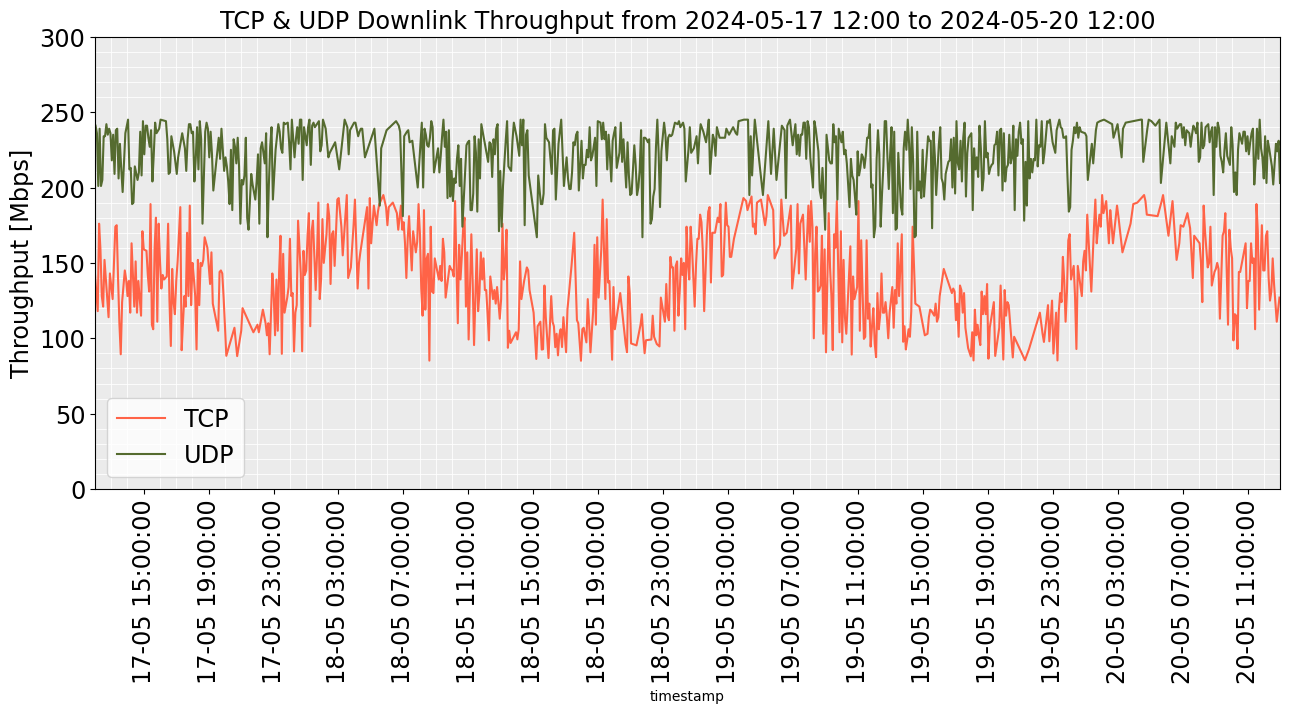

In [4]:
dateBegin = '2024-05-17 12'
dateEnd = '2024-05-20 12'
tcp_plot = date_rang(bitrateTCP,dateBegin,dateEnd)
udp_plot = date_rang(bitrateUDP,dateBegin,dateEnd)

fig, ax = plt.subplots()
ax.tick_params(axis='both', which='major', labelsize = 'xx-large')
title_str = f'TCP & UDP Downlink Throughput from {date_to_string(dateBegin)} to {date_to_string(dateEnd)}'
plt.title(title_str, fontsize = 'xx-large')
ax.set_facecolor('#EBEBEB')
ax.set_ylim(bottom=0, top=300)
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.minorticks_on()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax.margins(x=0)
ax.set_xlabel('time (s)')
ax.set_ylabel('Throughput [Mbps]',fontsize = 'xx-large')
tcp_plot['bitrate'].plot(ax=ax, color='tomato',figsize=(13*cm,6*cm))
udp_plot['bitrate'].plot(ax=ax, color='darkolivegreen',figsize=(13*cm,6*cm))
ax.tick_params(axis='y')
plt.legend(['TCP','UDP'],fontsize = 'xx-large')
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax.tick_params(which='minor', bottom=False, left=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))
ax.tick_params(axis='both', which='major', labelsize = 'xx-large')
plt.savefig('png/TCP_UDP_long.png',bbox_inches='tight')
plt.show()

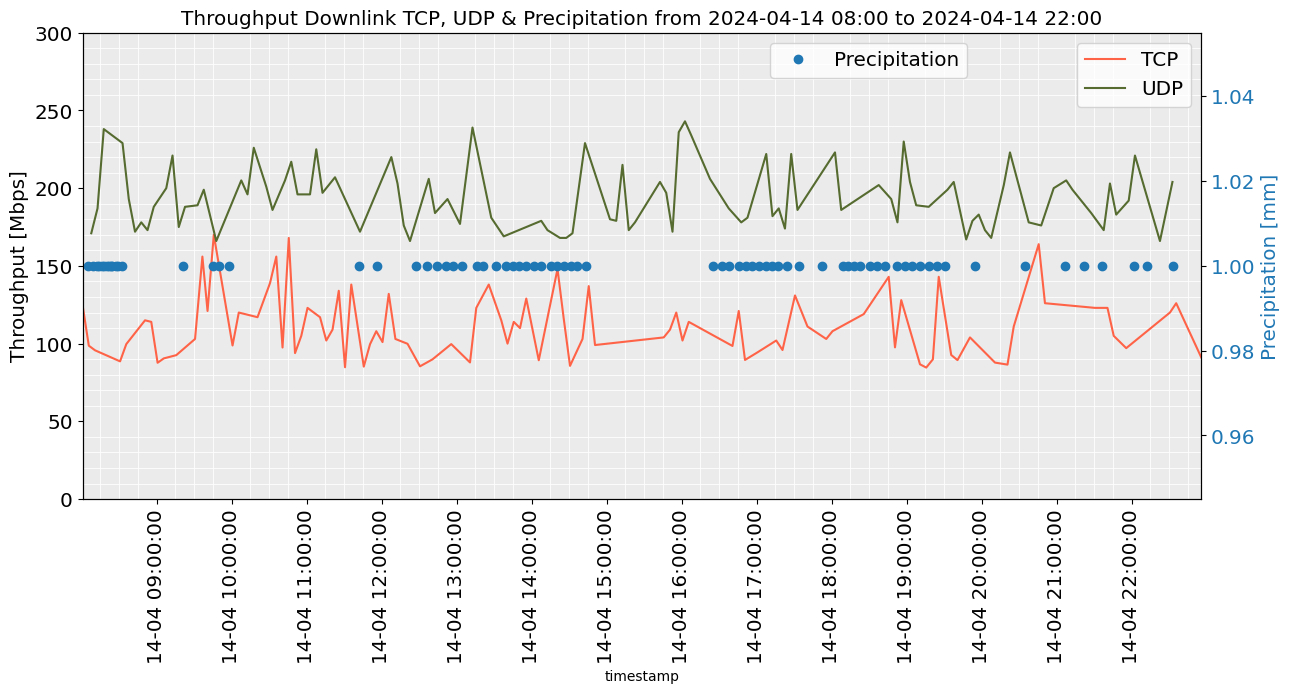

In [5]:
day12_04_begin = '2024-04-12 08'
day12_04_end = '2024-04-12 22'
day13_04_begin = '2024-04-13 08'
day13_04_end = '2024-04-13 22'
PrecipitationDay_begin = '2024-04-14 08'
PrecipitationDay_end = '2024-04-14 22'
tcp_plot = date_rang(bitrateTCP,PrecipitationDay_begin,PrecipitationDay_end)
udp_plot = date_rang(bitrateUDP,PrecipitationDay_begin,PrecipitationDay_end)
Precipitation_plot = date_rang(Precipitation,PrecipitationDay_begin,PrecipitationDay_end)

fig, ax1 = plt.subplots()
ax1.tick_params(axis='both', which='major', labelsize = 'x-large')
title_str = f'Throughput Downlink TCP, UDP & Precipitation from {date_to_string(PrecipitationDay_begin)} to {date_to_string(PrecipitationDay_end)}'
plt.title(title_str, fontsize = 'x-large')
ax1.set_facecolor('#EBEBEB')
ax1.set_ylim(bottom=0, top=300)
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax1.minorticks_on()
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax1.margins(x=0)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Throughput [Mbps]',fontsize = 'x-large')
tcp_plot['bitrate'].plot(ax=ax1, color='tomato',figsize=(13*cm,6*cm))
udp_plot['bitrate'].plot(ax=ax1, color='darkolivegreen',figsize=(13*cm,6*cm))
ax1.tick_params(axis='y')
plt.legend(['TCP','UDP'],fontsize = 'x-large')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='both', which='major', labelsize = 'x-large')
color = 'tab:blue'
ax2.set_ylabel('Precipitation [mm]', color=color,fontsize = 'x-large')  # we already handled the x-label with ax1
Precipitation_plot['p0'].plot(ax=ax2,ls='', marker='o', color=color,figsize=(13*cm,6*cm))
ax2.tick_params(axis='y', labelcolor=color)
for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.tick_params(which='minor', bottom=False, left=False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))
plt.legend(['Precipitation'],bbox_to_anchor=(0.80,1), loc='upper right',fontsize = 'x-large')
ax1.tick_params(axis='both', which='major', labelsize = 'x-large')
plt.savefig('png/PrecipitationTCP_UDP.png',bbox_inches='tight')
plt.show()

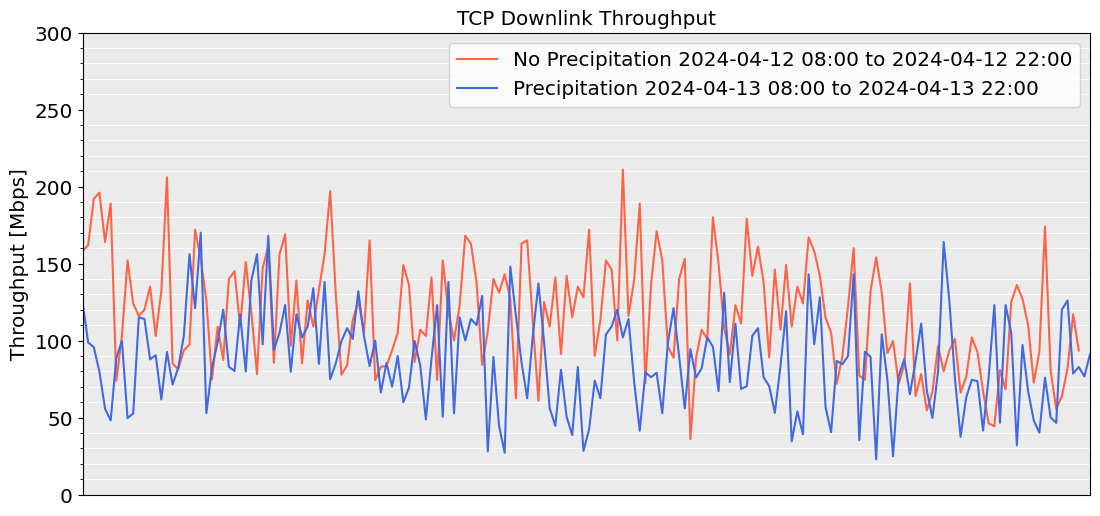

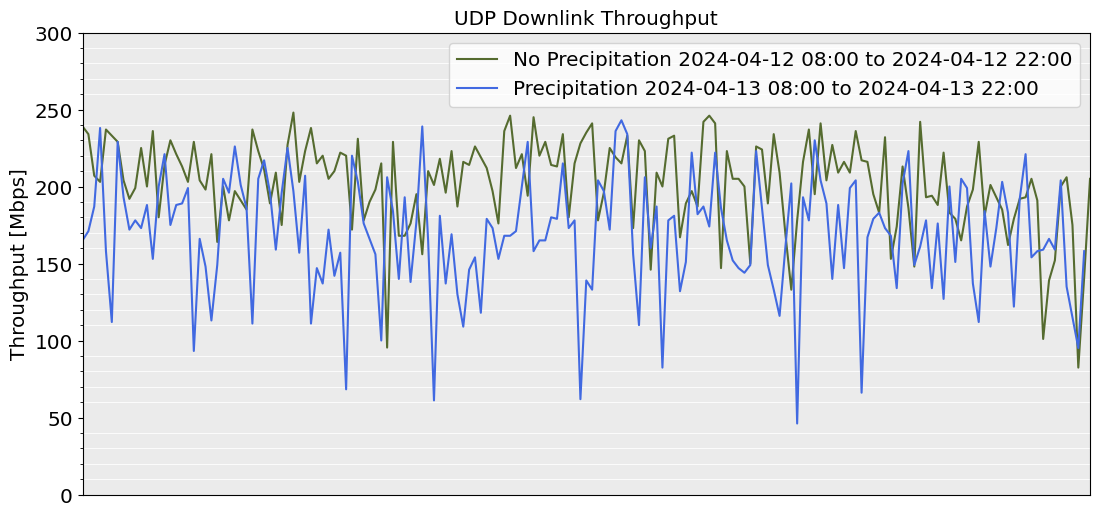

In [6]:
str1 = f'No Precipitation {date_to_string(day12_04_begin)} to {date_to_string(day12_04_end)}'
str2 = f'Precipitation {date_to_string(day13_04_begin)} to {date_to_string(day13_04_end)}'
bitrateDate1_TCP = date_rang((get_df('data/downlink_receiver.csv')['bitrate']),day12_04_begin,day12_04_end).reset_index(drop=True)
bitrateDate2_TCP = date_rang((get_df('data/downlink_receiver.csv')['bitrate']),day13_04_begin,day13_04_end).reset_index(drop=True)
bitrateDate3_TCP = date_rang((get_df('data/downlink_receiver.csv')['bitrate']),PrecipitationDay_begin,PrecipitationDay_end).reset_index(drop=True)
fig, ax = plt.subplots()
plt.title('TCP Downlink Throughput', fontsize='x-large')
ax.set_ylabel('Throughput [Mbps]',fontsize = 'x-large')
ax.set_facecolor('#EBEBEB')
ax.margins(x=0)
ax.minorticks_on()
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.set_xticks([])
ax.set_ylim(bottom=0, top=300)
bitrateDate2_TCP.plot(ax=ax, color='tomato',figsize=(13*cm,6*cm))
bitrateDate3_TCP.plot(ax=ax, color='royalblue',figsize=(13*cm,6*cm))
plt.legend([str1,str2],fontsize = 'x-large')
ax.tick_params(axis='both', which='major', labelsize = 'x-large')
plt.savefig('png/TCPPrecipitationVsNoPrecipitation.png',bbox_inches='tight')
plt.show()
str1 = f'No Precipitation {date_to_string(day12_04_begin)} to {date_to_string(day12_04_end)}'
str2 = f'Precipitation {date_to_string(day13_04_begin)} to {date_to_string(day13_04_end)}'
bitrateDate1_UDP = date_rang((get_df('data/downlinkUDP_receiver.csv')['bitrate']),day12_04_begin,day12_04_end).reset_index(drop=True).apply(pd.to_numeric,errors='coerce')
bitrateDate2_UDP = date_rang((get_df('data/downlinkUDP_receiver.csv')['bitrate']),day13_04_begin,day13_04_end).reset_index(drop=True).apply(pd.to_numeric,errors='coerce')
bitrateDate3_UDP = date_rang((get_df('data/downlinkUDP_receiver.csv')['bitrate']),PrecipitationDay_begin,PrecipitationDay_end).reset_index(drop=True).apply(pd.to_numeric,errors='coerce')
fig, ax = plt.subplots()
ax.margins(x=0)
ax.minorticks_on()
plt.title('UDP Downlink Throughput', fontsize='x-large')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.set_facecolor('#EBEBEB')
ax.set_ylabel('Throughput [Mbps]',fontsize = 'x-large')
ax.set_ylim(bottom=0, top=300)
ax.set_xticks([])
ax.tick_params(axis='both', which='major', labelsize = 'x-large')
bitrateDate2_UDP.plot(ax=ax, color='darkolivegreen',figsize=(13*cm,6*cm))
bitrateDate3_UDP.plot(ax=ax, color='royalblue',figsize=(13*cm,6*cm))
plt.legend([str1,str2],fontsize = 'x-large')
plt.savefig('png/UDPPrecipitationVsNoPrecipitation.png',bbox_inches='tight')
plt.show()

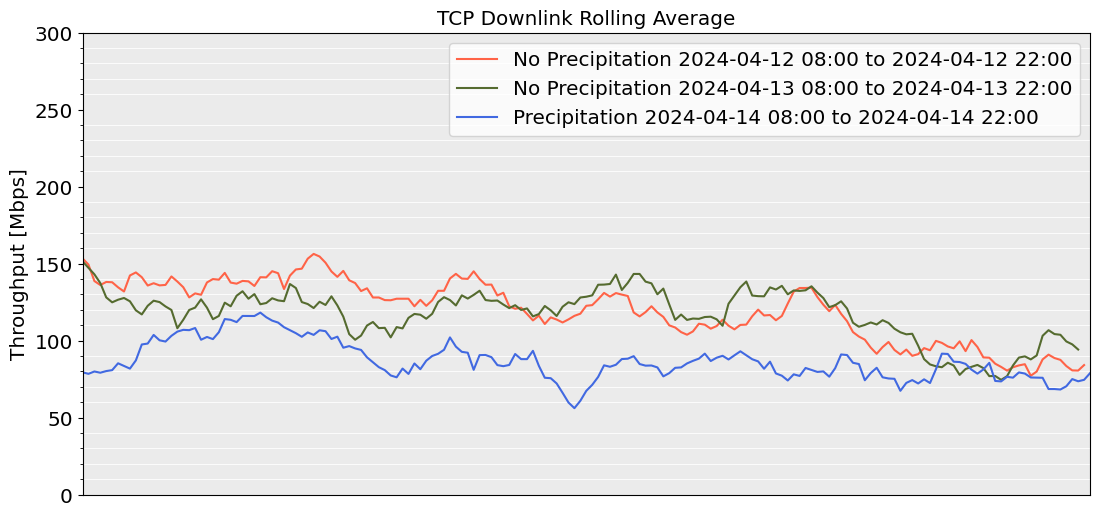

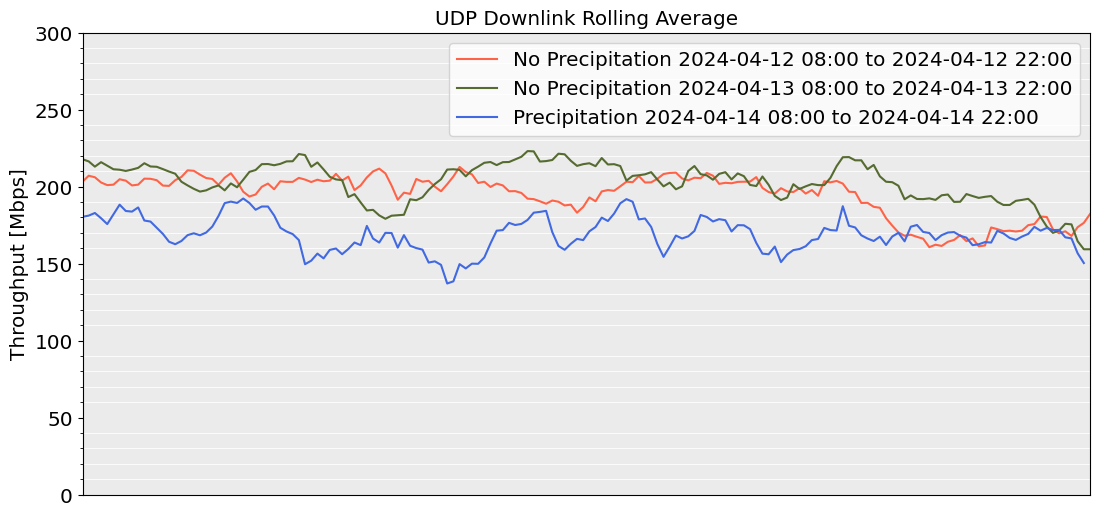

In [7]:
str1 = f'No Precipitation {date_to_string(day12_04_begin)} to {date_to_string(day12_04_end)}'
str2 = f'No Precipitation {date_to_string(day13_04_begin)} to {date_to_string(day13_04_end)}'
str3 = f'Precipitation {date_to_string(PrecipitationDay_begin)} to {date_to_string(PrecipitationDay_end)}'
fig, ax = plt.subplots()
ax.margins(x=0)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize = 'x-large')
plt.title('TCP Downlink Rolling Average', fontsize='x-large')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.set_facecolor('#EBEBEB')
ax.set_ylabel('Throughput [Mbps]',fontsize = 'x-large')
ax.set_ylim(bottom=0, top=300)
ax.set_xticks([])
bitrateDate1_TCP.rolling(10).mean().plot(ax=ax, color='tomato',figsize=(13*cm,6*cm))
bitrateDate2_TCP.rolling(10).mean().plot(ax=ax, color='darkolivegreen',figsize=(13*cm,6*cm))
bitrateDate3_TCP.rolling(10).mean().plot(ax=ax, color='royalblue',figsize=(13*cm,6*cm))
plt.legend([str1,str2,str3],fontsize = 'x-large')

ax.tick_params(axis='both', which='major', labelsize = 'x-large')
plt.savefig('png/TCProlling.png',bbox_inches='tight')
plt.show()

str1 = f'No Precipitation {date_to_string(day12_04_begin)} to {date_to_string(day12_04_end)}'
str2 = f'No Precipitation {date_to_string(day13_04_begin)} to {date_to_string(day13_04_end)}'
str3 = f'Precipitation {date_to_string(PrecipitationDay_begin)} to {date_to_string(PrecipitationDay_end)}'
fig, ax = plt.subplots()
ax.margins(x=0)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize = 'x-large')
plt.title('UDP Downlink Rolling Average', fontsize='x-large')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.set_facecolor('#EBEBEB')
ax.set_ylabel('Throughput [Mbps]',fontsize ='x-large')
ax.set_ylim(bottom=0, top=300)
ax.set_xticks([])
bitrateDate1_UDP.rolling(10).mean().plot(ax=ax, color='tomato',figsize=(13*cm,6*cm))
bitrateDate2_UDP.rolling(10).mean().plot(ax=ax, color='darkolivegreen',figsize=(13*cm,6*cm))
bitrateDate3_UDP.rolling(10).mean().plot(ax=ax, color='royalblue',figsize=(13*cm,6*cm))
plt.legend([str1,str2,str3],fontsize = 'x-large')
plt.savefig('png/UDProlling.png',bbox_inches='tight')
plt.show()

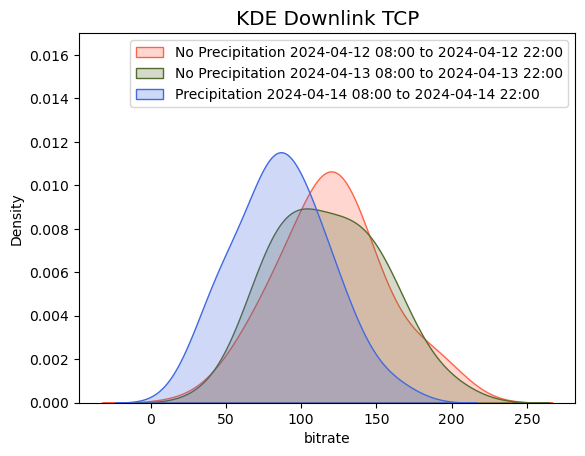

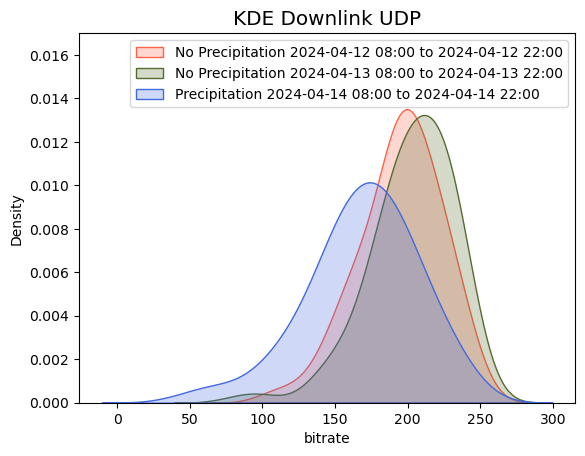

In [8]:
str1 = f'No Precipitation {date_to_string(day12_04_begin)} to {date_to_string(day12_04_end)}'
str2 = f'No Precipitation {date_to_string(day13_04_begin)} to {date_to_string(day13_04_end)}'
str3 = f'Precipitation {date_to_string(PrecipitationDay_begin)} to {date_to_string(PrecipitationDay_end)}'
fig, ax = plt.subplots()
sns.kdeplot(bitrateDate1_TCP , bw_method = 0.5 , fill = True,color='tomato', ax=ax)
sns.kdeplot(bitrateDate2_TCP , bw_method = 0.5 , fill = True, color='darkolivegreen', ax=ax)
sns.kdeplot(bitrateDate3_TCP , bw_method = 0.5 , fill = True, color='royalblue', ax=ax)
plt.legend([str1,str2,str3],fontsize = 'medium')
ax.set_ylim(bottom=0, top=0.017)
#plt.tight_layout()
plt.title('KDE Downlink TCP', fontsize='x-large')
plt.savefig('png/KDE_rainyDay_TCP.png')
plt.show()

fig, ax = plt.subplots()
str1 = f'No Precipitation {date_to_string(day12_04_begin)} to {date_to_string(day12_04_end)}'
str2 = f'No Precipitation {date_to_string(day13_04_begin)} to {date_to_string(day13_04_end)}'
str3 = f'Precipitation {date_to_string(PrecipitationDay_begin)} to {date_to_string(PrecipitationDay_end)}'
sns.kdeplot(bitrateDate1_UDP , bw_method = 0.5 , fill = True,color='tomato', ax=ax)
sns.kdeplot(bitrateDate2_UDP , bw_method = 0.5 , fill = True, color='darkolivegreen', ax=ax)
sns.kdeplot(bitrateDate3_UDP , bw_method = 0.5 , fill = True, color='royalblue',ax=ax)
plt.legend([str1,str2,str3],fontsize = 'medium')
#plt.tight_layout()
plt.title('KDE Downlink UDP', fontsize='x-large')
ax.set_ylim(bottom=0, top=0.017)
plt.savefig('png/KDE_rainyDay_UDP.png')
plt.show()

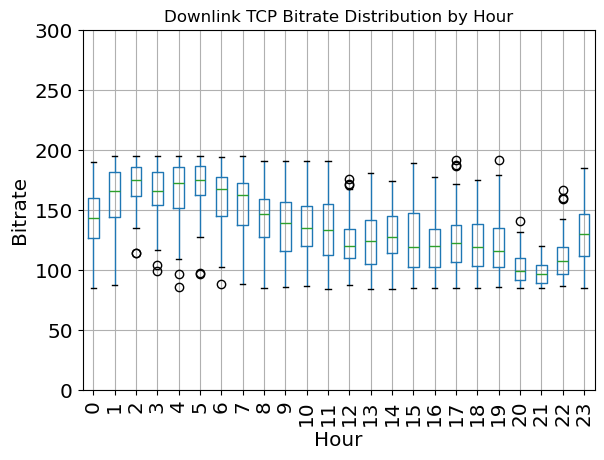

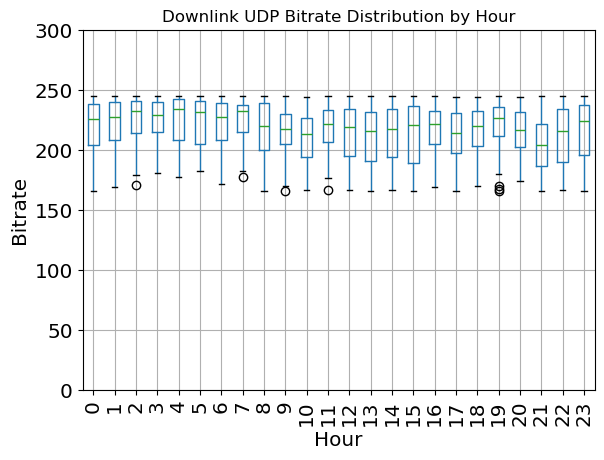

In [9]:
tcp_plot = date_rang(bitrateTCP,boxplotDate_begin,boxplotDate_end)
udp_plot = date_rang(bitrateUDP,boxplotDate_begin,boxplotDate_end)
fig, ax = plt.subplots()
tcp_plot.boxplot(ax=ax,column='bitrate',by='hours',figsize=(13*cm, 6*cm))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax.get_figure().suptitle("")
ax.set_ylim(bottom=0, top=300)
ax.set_title('Downlink TCP Bitrate Distribution by Hour')
ax.set_xlabel('Hour',fontsize = 'x-large')
ax.set_ylabel('Bitrate',fontsize = 'x-large')
ax.tick_params(axis='both', which='major', labelsize = 'x-large')
plt.savefig('png/boxplot_TCPhour.png')
plt.show()

fig, ax = plt.subplots()

udp_plot.boxplot(ax=ax,column='bitrate',by='hours',figsize=(13*cm, 6*cm))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')

ax.get_figure().suptitle("")
ax.set_title('Downlink UDP Bitrate Distribution by Hour')
ax.set_xlabel('Hour',fontsize = 'x-large')
ax.set_ylim(bottom=0, top=300)
ax.set_ylabel('Bitrate',fontsize = 'x-large')
ax.tick_params(axis='both', which='major', labelsize = 'x-large')
plt.savefig('png/boxplot_UDPhour.png')
plt.show()